# Sensor Component Failure Prediction

## 1) Problem Statement.

**Data:** Sensor Data

**Problem Statement:**
- The system in focus is the Air Pressure System(APS) which generates pressurized air that are utilized in various functions in a truck like braking and gear changes. The datasets positive class corresponds to failure of specific component of the APS. The negative class corresponds to failure of components not related to APS .
- The goal is to reduce the cost due to unnecessary repairs, so false predication has to be reduced.

|True class | Positive | Negative | |
| ----------- | ----------- |   |  |
|<b>Predicted class</b>||| |
| Positive      |   -       | cost_1  |    |
| Negative   | cost_2        |  | |


Cost 1 = 10 and Cost 2 = 500

- The total cost of a prediction model is the sum of `Cost_1` multiplied by the number of instances with type 1 failure and `Cost_2` with the number of instances with type 2 failure, resulting in a `Total_cost`. In this case `Cost_1` refers to the cost that an unnessecary check needs to be done by a mechanic at a workshop, while `Cost_2` refers to the cost of missing to predict a faulty truck, which may cause breakdown. 
- `Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.`

- From the above we can observe that, we have to reduce false positives and false negatives. More importantly we have to **reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.**

6907.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     |████████████████████████████████| 293 kB 22.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


2) Important required libraries

In [48]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read Data

In [4]:
#Load csv file
df = pd.read_csv('aps_failure_training_set1.csv', na_values='na')

In [5]:
#check head of dataset
df.head

<bound method NDFrame.head of       class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       pos  153204     0.0  1.820000e+02     NaN     0.0     0.0     0.0   
1       pos  453236     NaN  2.926000e+03     NaN     0.0     0.0     0.0   
2       pos   72504     NaN  1.594000e+03  1052.0     0.0     0.0     0.0   
3       pos  762958     NaN           NaN     NaN     NaN     NaN   776.0   
4       pos  695994     NaN           NaN     NaN     NaN     NaN     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
36183   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
36184   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
36185   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
36186   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
36187   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

         ag_001     ag_002  ...     ee_002   

In [6]:
#Check unique values of target variable
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [10]:
#Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != '0']
categorical_features = [feature for feature in df.columns if df[feature].dtype == '0']

# print columns
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')


We have 171 numerical features: ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 

As this is a Sensor Data, interpretation of the data is not required.

Checking missing values

<function matplotlib.pyplot.show(close=None, block=None)>

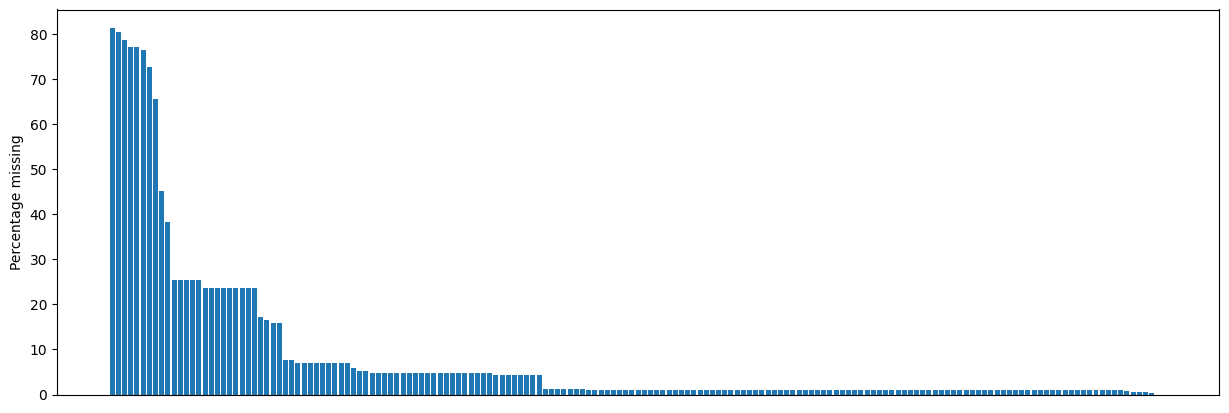

In [34]:
#Plotting Missing values count for each columns
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])

plt.xticks([])
plt.ylabel('Percentage missing')
plt.show

Dropping columns which has more than 70% missing values

In [35]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [36]:
df.drop(list(dropcols.index), axis=1, inplace=True)

Shape of dataset after dropping columns

In [38]:
df.shape

(36188, 164)

In [44]:
# percentage of missing data
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print(f'Percentage of total missing cells in the data {(total_missing/total_cells)*100}%')

Percentage of total missing cells in the data 5.37059852747306%


## Visualization of unique values in the target variable

Positive: 1000, Negative: 35188


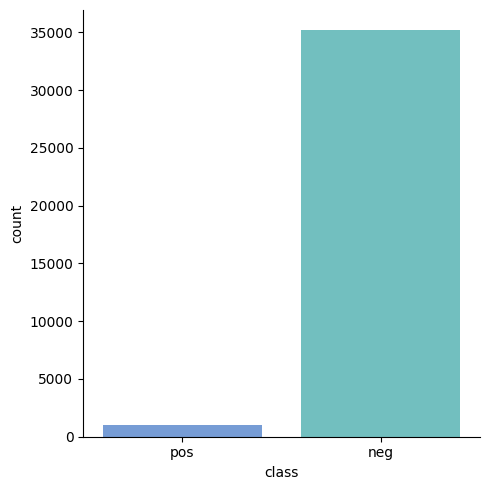

In [50]:
pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
print(f'Positive: {pos}, Negative: {neg}')

sns.catplot(data=df, x='class', kind='count', palette='winter', alpha=.6)
plt.show()

**Report**
- The target classes are highly impbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.

**How to handle Imbalance Data ?**
- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

## Create Functions for model training and evaluation

In [ ]:
def evalute_clf(true, predicted):
    '''